In [1]:
import pandas as pd
df = pd.read_csv("extended_stress_detection_data.csv")
df.head()

,Age,Gender,Occupation,Marital_Status,Sleep_Duration,Sleep_Quality,Wake_Up_Time,Bed_Time,Physical_Activity,Screen_Time,...,Smoking_Habit,Work_Hours,Travel_Time,Social_Interactions,Meditation_Practice,Exercise_Type,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level,Stress_Detection
0,30.0,Male,Software Engineer,Single,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8.0,1.0,5.0,Yes,Cardio,120.0,180.0,90.0,Low
1,35.0,Female,Marketing Manager,Married,6.0,3.0,6:00 AM,11:00 PM,1.0,3.0,...,No,9.0,2.0,3.0,No,Yoga,110.0,160.0,80.0,Medium
2,40.0,Male,Data Scientist,Divorced,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8.0,1.0,5.0,Yes,Strength Training,130.0,200.0,100.0,High
3,35.0,Male,Software Engineer,Single,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8.0,1.0,5.0,Yes,Cardio,120.0,180.0,90.0,Low
4,29.0,Female,Teacher,Single,8.0,5.0,6:30 AM,10:30 PM,3.0,2.0,...,No,7.0,1.0,4.0,Yes,Yoga,110.0,180.0,90.0,Low


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  3000 non-null   float64
 1   Gender               3000 non-null   object 
 2   Occupation           3000 non-null   object 
 3   Marital_Status       3000 non-null   object 
 4   Sleep_Duration       3000 non-null   float64
 5   Sleep_Quality        3000 non-null   float64
 6   Wake_Up_Time         3000 non-null   object 
 7   Bed_Time             3000 non-null   object 
 8   Physical_Activity    3000 non-null   float64
 9   Screen_Time          3000 non-null   float64
 10  Caffeine_Intake      3000 non-null   int64  
 11  Alcohol_Intake       3000 non-null   int64  
 12  Smoking_Habit        3000 non-null   object 
 13  Work_Hours           3000 non-null   float64
 14  Travel_Time          3000 non-null   float64
 15  Social_Interactions  3000 non-null   f

In [7]:
cat_cols = df.select_dtypes(include = ['object']).columns

In [39]:
cat = ['Gender', 'Occupation', 'Marital_Status',
       'Smoking_Habit', 'Meditation_Practice', 'Exercise_Type',
       'Stress_Detection']
for col in cat:
  print(df[col].unique())
  print("-" * 40)

[1 0]
----------------------------------------
['Software Engineer' 'Marketing Manager' 'Data Scientist' 'Teacher'
 'Doctor' 'Graphic Designer' 'Civil Engineer' 'Business Owner' 'Nurse'
 'Software Developer' 'Research Assistant' 'Architect' 'Lawyer'
 'Physician' 'Engineer' 'Business Consultant' 'Retired' 'IT Manager'
 'Content Writer' 'Project Manager' 'HR Specialist' 'Sales Executive'
 'Nutritionist' 'Psychologist' 'Journalist' 'Business Analyst'
 'Pharmacist' 'Consultant' 'Data Analyst' 'Product Manager'
 'Operations Manager' 'Accountant' 'Interior Designer'
 'Marketing Specialist' 'HR Manager' 'Construction Worker'
 'Research Scientist' 'Chef' 'Freelancer' 'IT Consultant' 'SEO Specialist'
 'Photographer' 'Financial Analyst' 'Sales Manager' 'Event Planner'
 'Truck Driver' 'Real Estate Agent' 'Actor' 'Electrician'
 'Human Resources' 'Librarian' 'Bartender' 'Web Developer'
 'Fitness Trainer' 'Musician' 'Artist' 'Scientist' 'Veterinarian' 'Nanny'
 'Driver' 'Student' 'Manager' 'Writer' '

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Stress_Detection'] = le.fit_transform(df['Stress_Detection'])

In [28]:
df['Smoking_Habit'] = le.fit_transform(df['Smoking_Habit'])
df['Meditation_Practice'] = le.fit_transform(df['Meditation_Practice'])

In [33]:
df['Gender'] = le.fit_transform(df['Gender'])

In [16]:
cat_features = ['Gender', 'Occupation', 'Marital_Status',
                'Wake_Up_Time', 'Bed_Time', 'Smoking_Habit',
                'Meditation_Practice', 'Exercise_Type']

In [17]:
df_copy = df.copy()
df_copy = pd.get_dummies(df_copy, columns = cat_features, drop_first = True)

In [18]:
df_copy

,Age,Sleep_Duration,Sleep_Quality,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,Work_Hours,Travel_Time,Social_Interactions,...,Bed_Time_9:00 PM,Bed_Time_9:30 PM,Smoking_Habit_Yes,Meditation_Practice_Yes,Exercise_Type_Cardio,Exercise_Type_Meditation,Exercise_Type_Pilates,Exercise_Type_Strength Training,Exercise_Type_Walking,Exercise_Type_Yoga
0,30.00,7.00,4.00,2.00,4.00,1,0,8.00,1.00,5.00,...,False,False,False,True,True,False,False,False,False,False
1,35.00,6.00,3.00,1.00,3.00,0,1,9.00,2.00,3.00,...,False,False,False,False,False,False,False,False,False,True
2,40.00,7.00,4.00,2.00,4.00,1,0,8.00,1.00,5.00,...,False,False,False,True,False,False,False,True,False,False
3,35.00,7.00,4.00,2.00,4.00,1,0,8.00,1.00,5.00,...,False,False,False,True,True,False,False,False,False,False
4,29.00,8.00,5.00,3.00,2.00,1,0,7.00,1.00,4.00,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,40.03,7.53,4.37,1.76,4.07,1,1,12.19,2.20,1.50,...,False,False,False,True,False,False,True,False,False,False
2996,43.57,7.47,4.64,2.77,3.90,2,1,8.56,1.72,-0.41,...,False,False,True,False,True,False,False,False,False,False
2997,32.58,6.46,4.57,2.08,5.24,2,1,7.72,3.06,1.63,...,False,False,False,False,True,False,False,False,False,False
2998,47.07,7.85,4.84,2.70,5.27,1,1,8.73,0.15,2.51,...,False,False,False,True,False,False,False,False,False,True


In [34]:
df

,Age,Gender,Occupation,Marital_Status,Sleep_Duration,Sleep_Quality,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,...,Travel_Time,Social_Interactions,Meditation_Practice,Exercise_Type,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level,Stress_Detection,Wake_Up_Hour,Bed_Hour
0,30.00,1,Software Engineer,Single,7.00,4.00,2.00,4.00,1,0,...,1.00,5.00,1,Cardio,120.00,180.00,90.00,1,7,22
1,35.00,0,Marketing Manager,Married,6.00,3.00,1.00,3.00,0,1,...,2.00,3.00,0,Yoga,110.00,160.00,80.00,2,6,23
2,40.00,1,Data Scientist,Divorced,7.00,4.00,2.00,4.00,1,0,...,1.00,5.00,1,Strength Training,130.00,200.00,100.00,0,7,22
3,35.00,1,Software Engineer,Single,7.00,4.00,2.00,4.00,1,0,...,1.00,5.00,1,Cardio,120.00,180.00,90.00,1,7,22
4,29.00,0,Teacher,Single,8.00,5.00,3.00,2.00,1,0,...,1.00,4.00,1,Yoga,110.00,180.00,90.00,1,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,40.03,1,Taxi Driver,Single,7.53,4.37,1.76,4.07,1,1,...,2.20,1.50,1,Pilates,130.87,224.81,115.30,1,5,23
2996,43.57,0,Graphic Designer,Single,7.47,4.64,2.77,3.90,2,1,...,1.72,-0.41,0,Cardio,144.58,225.02,114.91,2,9,18
2997,32.58,0,Public Relations Specialist,Single,6.46,4.57,2.08,5.24,2,1,...,3.06,1.63,0,Cardio,141.92,214.07,111.00,2,8,17
2998,47.07,1,Software Engineer,Divorced,7.85,4.84,2.70,5.27,1,1,...,0.15,2.51,1,Yoga,134.97,228.03,120.04,0,6,22


In [21]:
# Convert Wake Up Time
df['Wake_Up_Hour'] = pd.to_datetime(df['Wake_Up_Time'], format='%I:%M %p').dt.hour

# Convert Bed Time
df['Bed_Hour'] = pd.to_datetime(df['Bed_Time'], format='%I:%M %p').dt.hour

# Drop old columns if not needed
df = df.drop(['Wake_Up_Time', 'Bed_Time'], axis=1)

In [26]:
df['Bed_Hour'].value_counts()

,count
Bed_Hour,
22,801
18,623
23,612
17,415
21,202
19,151
0,141
20,28
1,18


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  3000 non-null   float64
 1   Gender               3000 non-null   int64  
 2   Occupation           3000 non-null   object 
 3   Marital_Status       3000 non-null   object 
 4   Sleep_Duration       3000 non-null   float64
 5   Sleep_Quality        3000 non-null   float64
 6   Physical_Activity    3000 non-null   float64
 7   Screen_Time          3000 non-null   float64
 8   Caffeine_Intake      3000 non-null   int64  
 9   Alcohol_Intake       3000 non-null   int64  
 10  Smoking_Habit        3000 non-null   int64  
 11  Work_Hours           3000 non-null   float64
 12  Travel_Time          3000 non-null   float64
 13  Social_Interactions  3000 non-null   float64
 14  Meditation_Practice  3000 non-null   int64  
 15  Exercise_Type        3000 non-null   o

In [37]:
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

In [38]:
df.head()

,Age,Gender,Occupation,Marital_Status,Sleep_Duration,Sleep_Quality,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,...,Travel_Time,Social_Interactions,Meditation_Practice,Exercise_Type,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level,Stress_Detection,Wake_Up_Hour,Bed_Hour
0,30.0,1,Software Engineer,2,7.0,4.0,2.0,4.0,1,0,...,1.0,5.0,1,Cardio,120.0,180.0,90.0,1,7,22
1,35.0,0,Marketing Manager,1,6.0,3.0,1.0,3.0,0,1,...,2.0,3.0,0,Yoga,110.0,160.0,80.0,2,6,23
2,40.0,1,Data Scientist,0,7.0,4.0,2.0,4.0,1,0,...,1.0,5.0,1,Strength Training,130.0,200.0,100.0,0,7,22
3,35.0,1,Software Engineer,2,7.0,4.0,2.0,4.0,1,0,...,1.0,5.0,1,Cardio,120.0,180.0,90.0,1,7,22
4,29.0,0,Teacher,2,8.0,5.0,3.0,2.0,1,0,...,1.0,4.0,1,Yoga,110.0,180.0,90.0,1,6,22


In [43]:
df = pd.get_dummies(df, columns=['Occupation', 'Exercise_Type'], drop_first=True)

In [44]:
df

,Age,Gender,Marital_Status,Sleep_Duration,Sleep_Quality,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,Smoking_Habit,...,Occupation_Warehouse Worker,Occupation_Weaver,Occupation_Web Developer,Occupation_Writer,Exercise_Type_Cardio,Exercise_Type_Meditation,Exercise_Type_Pilates,Exercise_Type_Strength Training,Exercise_Type_Walking,Exercise_Type_Yoga
0,30.00,1,2,7.00,4.00,2.00,4.00,1,0,0,...,False,False,False,False,True,False,False,False,False,False
1,35.00,0,1,6.00,3.00,1.00,3.00,0,1,0,...,False,False,False,False,False,False,False,False,False,True
2,40.00,1,0,7.00,4.00,2.00,4.00,1,0,0,...,False,False,False,False,False,False,False,True,False,False
3,35.00,1,2,7.00,4.00,2.00,4.00,1,0,0,...,False,False,False,False,True,False,False,False,False,False
4,29.00,0,2,8.00,5.00,3.00,2.00,1,0,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,40.03,1,2,7.53,4.37,1.76,4.07,1,1,0,...,False,False,False,False,False,False,True,False,False,False
2996,43.57,0,2,7.47,4.64,2.77,3.90,2,1,1,...,False,False,False,False,True,False,False,False,False,False
2997,32.58,0,2,6.46,4.57,2.08,5.24,2,1,0,...,False,False,False,False,True,False,False,False,False,False
2998,47.07,1,0,7.85,4.84,2.70,5.27,1,1,0,...,False,False,False,False,False,False,False,False,False,True


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 194 entries, Age to Exercise_Type_Yoga
dtypes: bool(174), float64(11), int32(2), int64(7)
memory usage: 955.2 KB


In [51]:
df['Stress_Detection'].value_counts()

,count
Stress_Detection,
2,1258
0,1118
1,624


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [53]:
x = df.drop('Stress_Detection', axis = 1)
y = df['Stress_Detection']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [54]:
model = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [55]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.915
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       221
           1       0.97      0.75      0.85       117
           2       0.88      0.96      0.92       262

    accuracy                           0.92       600
   macro avg       0.93      0.89      0.90       600
weighted avg       0.92      0.92      0.91       600



In [56]:
import xgboost as xgb
from xgboost import XGBClassifier

In [57]:
xgb_model = XGBClassifier(random_state = 42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
pred = xgb_model.predict(x_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.9133333333333333
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       221
           1       0.90      0.78      0.83       117
           2       0.90      0.93      0.92       262

    accuracy                           0.91       600
   macro avg       0.91      0.89      0.90       600
weighted avg       0.91      0.91      0.91       600



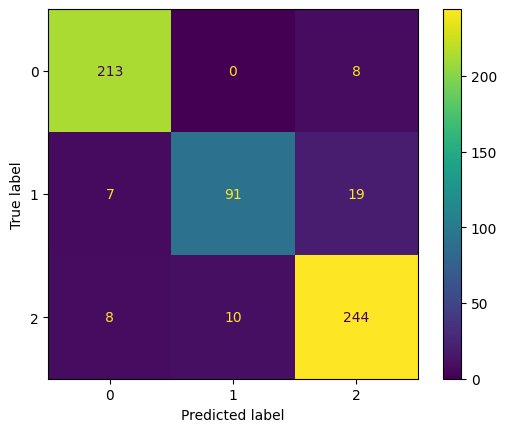

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.show()

Top 20 Feature Importances:
Caffeine_Intake                   0.062413
Occupation_Research Scientist     0.026985
Occupation_Veterinarian           0.025042
Occupation_UX Designer            0.020323
Exercise_Type_Meditation          0.019540
Cholesterol_Level                 0.019181
Occupation_Marketing Executive    0.019031
Occupation_IT Manager             0.018993
Blood_Pressure                    0.018545
Occupation_Electrician            0.017565
Occupation_Content Writer         0.017147
Occupation_Physicist              0.016966
Wake_Up_Hour                      0.015937
Occupation_Business Consultant    0.015427
Meditation_Practice               0.015426
Alcohol_Intake                    0.015208
Occupation_Security Guard         0.014661
Occupation_Writer                 0.014370
Bed_Hour                          0.013799
Occupation_Therapist              0.013761
dtype: float32


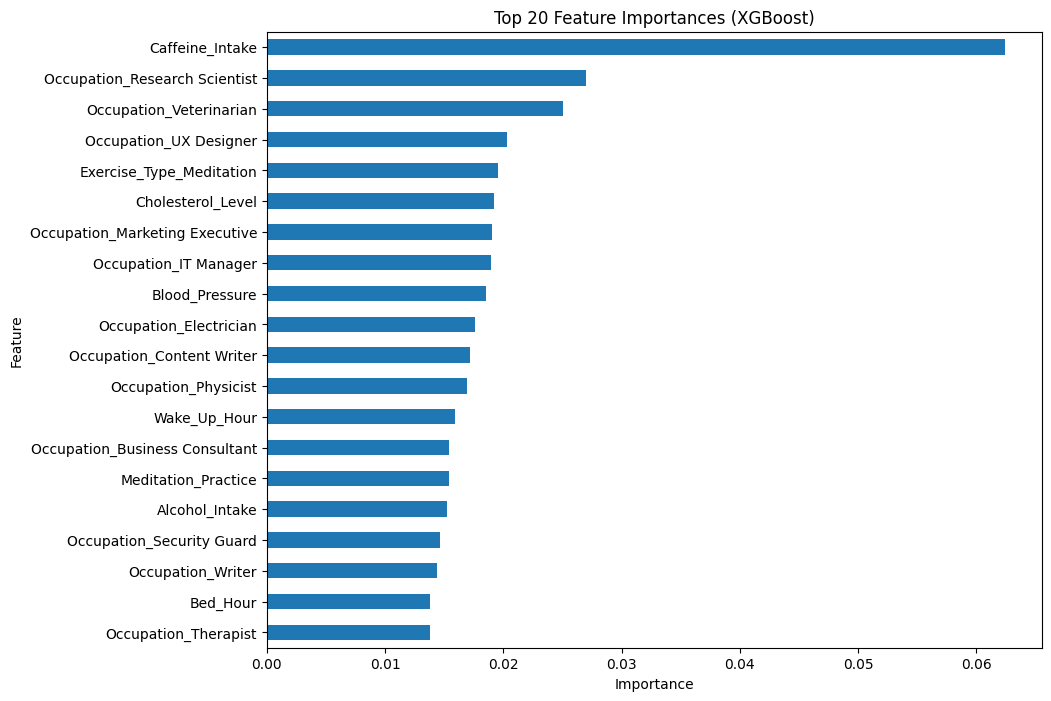

In [60]:
import matplotlib.pyplot as plt

# Get feature importances from the trained XGBoost model
feature_importances = xgb_model.feature_importances_

# Create a pandas Series for easier handling and sorting
feature_importances_series = pd.Series(feature_importances, index=x_train.columns)

# Sort the features by importance
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Display the top N most important features (e.g., top 20)
top_n = 20
print(f"Top {top_n} Feature Importances:")
print(sorted_feature_importances.head(top_n))

# Optionally, visualize the top N feature importances
plt.figure(figsize=(10, 8))
sorted_feature_importances.head(top_n).plot(kind='barh')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis() # Invert y-axis to show the most important feature at the top
plt.show()